In [ ]:
# !pip install catboost
# !pip install scikit-learn
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [98]:
# import dataset
df = pd.read_csv('CarPrice_Assignment.csv')

# Data Cleansing



In [99]:
# quick review dengan menampilkan 5 baris data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [100]:
# pengecekan tipe data kolom dan missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [101]:
# hapus kolom car_ID karena tidak akan digunakan dalam proses
df = df.drop(['car_ID'], axis=1)

In [102]:
# mengganti tipe data kolom 'symboling' menjadi object
df['symboling'] = df['symboling'].astype('str')

In [103]:
# mengambil nama merk mobil dari kolom 'CarName'
df['CarName'] = df['CarName'].str.split(' ', expand=True)[0]

In [104]:
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [105]:
# membersihkan data duplikat pada kolom CarName
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})
df.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Exploratory Data Analysis

- ### Pesebaran data harga mobil



Text(0.5, 0, 'Price')

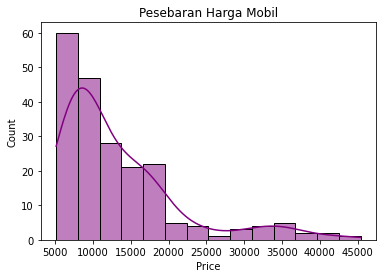

In [ ]:
# melihat pesebaran data menggunakan Histogram
fig = plt.figure()
ax = sns.histplot(x=df['price'], kde=True, color='purple')

plt.title("Pesebaran Harga Mobil")
plt.xlabel("Price")

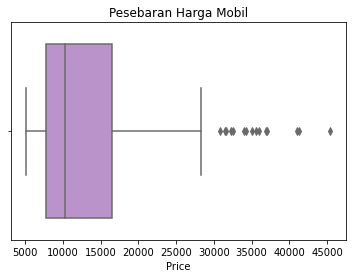

In [ ]:
# melihat pesebaran data menggunakan boxplot
fig = plt.figure()
ax = sns.boxplot(x='price', data=df, color='#bd8ad4')

plt.title("Pesebaran Harga Mobil")
plt.xlabel("Price")

plt.show()



*   Pesebaran data `price` right-skewed
*   Terdapat beberapa outliers
*   Data banyak tersebar di rentang 5000 - 20000



## Kolom-Kolom Kategorikal

In [ ]:
# cek kolom dengan tipe data kategorikal
cate_cols = df.select_dtypes(include=['object']).columns
df[cate_cols].head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,2,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
6,1,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,1,audi,gas,std,four,wagon,fwd,front,ohc,five,mpfi
8,1,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
9,0,audi,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi


In [ ]:
# fungsi untuk mempermudah visualisasi kolom kategorikal
def vis_cat(cat_column, title_count, title_box, xy_label):
    fig = plt.figure(figsize=(12, 5))

    ax = fig.add_subplot(121)
    sns.countplot(x = df[cat_column], palette = 'Set2', ax=ax)
    ax.set_title(title_count)
    plt.xlabel(xy_label)
    plt.ylabel("Count")

    ax = fig.add_subplot(122)
    sns.boxplot(y = cat_column, x = 'price', data = df, palette = 'Set2', ax=ax)
    ax.set_title(title_box)
    plt.xlabel("Price")
    plt.ylabel(xy_label)

    fig.tight_layout(pad=2)



- ### Symboling



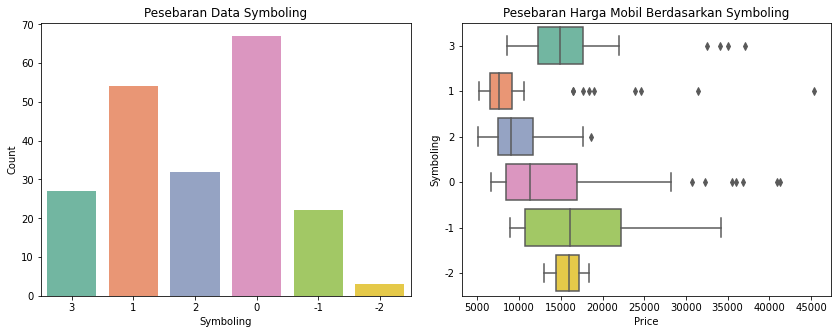

In [ ]:
# pesebaran data symboling dan perbandingannya dengan price
col = 'symboling'
title_c = 'Pesebaran Data Symboling'
title_b = 'Pesebaran Harga Mobil Berdasarkan Symboling'
label = 'Symboling'

vis_cat(col, title_c, title_b, label)

- Banyak mobil memiliki nilai Symboling 0 dan nilai Symboling paling sedikit adalah -2
- Mobil dengan symboling -1 cenderung memiliki harga paling tinggi (tidak mempertimbangkan outliers). Sebaliknya, mobil dengan symboling 1 cenderung memiliki harga paling rendah (tidak mempertimbangkan outliers)

- ### Car Name

Text(0, 0.5, 'Merek Mobil')

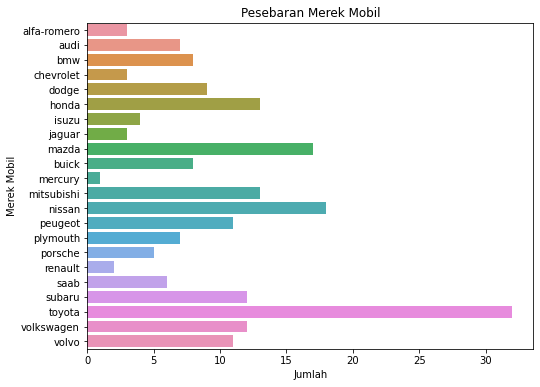

In [ ]:
# pesebaran data merek mobil
fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(y=df['CarName'])

plt.title("Pesebaran Merek Mobil")
plt.xlabel("Jumlah")
plt.ylabel("Merek Mobil")

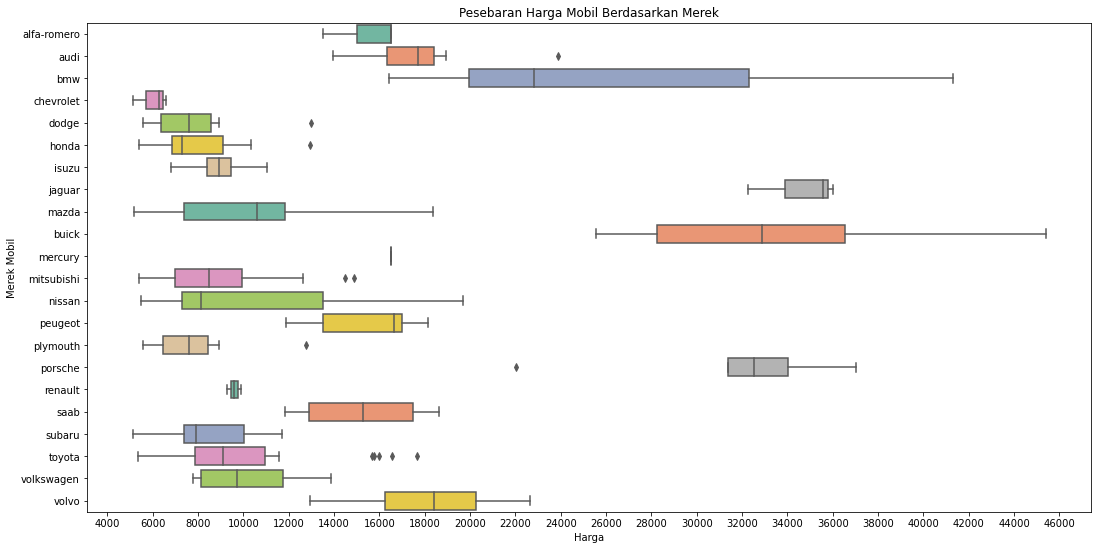

In [ ]:
# Pesebaran harga mobil berdasarkan merek
fig = plt.figure(figsize=(18, 9))
ax = sns.boxplot(y = 'CarName', x = 'price', data = df, palette = 'Set2')

ax.xaxis.set_major_locator(ticker.MultipleLocator(2000))

plt.title("Pesebaran Harga Mobil Berdasarkan Merek")
plt.xlabel("Harga")
plt.ylabel("Merek Mobil")

plt.show()



* Data mobil paling banyak adalah Toyota dan paling sedikit adalah Mercury.
* Setiap merek mobil memiliki rentang harga yang bervariasi.
* Merek mobil yang memiliki rentang harga paling besar adalah BMW dengan harga terkecil ~16000 dan harga tertinggi ~41000.
* Mobil dengan harga terendah adalah merek Subaru dan harga tertinggi adalah merek Buick.



- ### Fuel Type

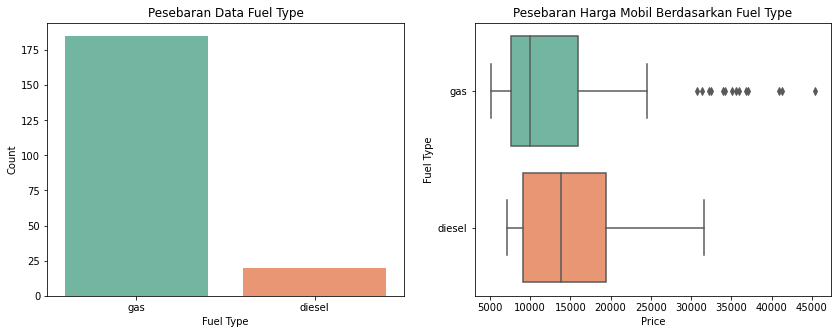

In [ ]:
# pesebaran data fueltype dan perbandingannya dengan price
col = 'fueltype'
title_c = 'Pesebaran Data Fuel Type'
title_b = 'Pesebaran Harga Mobil Berdasarkan Fuel Type'
label = 'Fuel Type'

vis_cat(col, title_c, title_b, label)

- Kebanyakan mobil menggunakan tipe bahan bakar gas.
- Harga mobil dengan tipe bahan bakar diesel cenderung lebih tinggi (tidak mempertimbangkan outliers).

- ### Aspiration

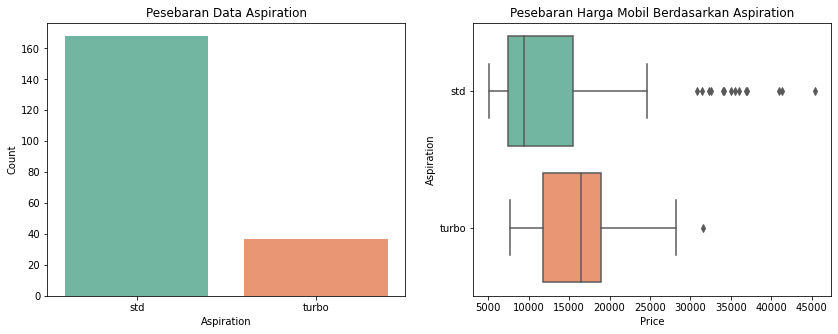

In [ ]:
# pesebaran data aspiration dan perbandingannya dengan price
col = 'aspiration'
title_c = 'Pesebaran Data Aspiration'
title_b = 'Pesebaran Harga Mobil Berdasarkan Aspiration'
label = 'Aspiration'

vis_cat(col, title_c, title_b, label)

- Lebih banyak mobil menggunakan standard aspiration.
- Mobil dengan turbo aspiration cenderung memiliki harga yang lebih tinggi (tanpa mempertimbangkan outliers).

- ### Door Number

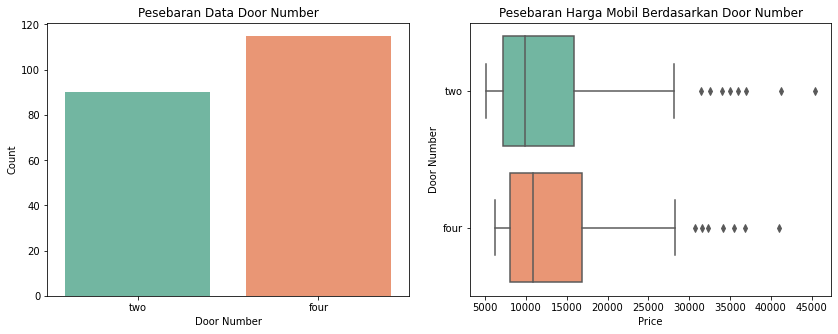

In [ ]:
# pesebaran data doornumber dan perbandingannya dengan price
col = 'doornumber'
title_c = 'Pesebaran Data Door Number'
title_b = 'Pesebaran Harga Mobil Berdasarkan Door Number'
label = 'Door Number'

vis_cat(col, title_c, title_b, label)

- Kebanyakan data adalah mobil empat pintu, namun selisihnya tidak terlalu jauh dibandingkan dengan mobil dua pintu.
- Ternyata mobil empat pintu sedikit lebih mahal daripada mobil dua pintu (tidak mempertimbangkan outliers).

- ### Car Body

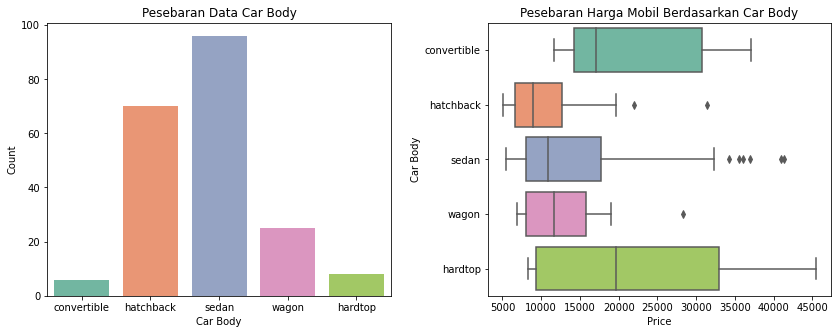

In [ ]:
# pesebaran data carbody dan perbandingannya dengan price
col = 'carbody'
title_c = 'Pesebaran Data Car Body'
title_b = 'Pesebaran Harga Mobil Berdasarkan Car Body'
label = 'Car Body'

vis_cat(col, title_c, title_b, label)

- Kebanyakan mobil memiliki bodi sedan, sedangkan tipe bodi paling sedikit adalah convertible.
- Mobil dengan bodi hardtop memiliki harga paling tinggi dibandingkan jenis bodi lainnya.

- ### Drive Wheel

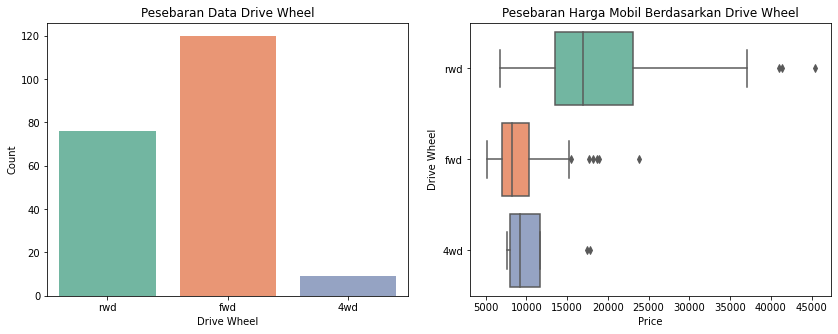

In [ ]:
# pesebaran data drivewheel dan perbandingannya dengan price
col = 'drivewheel'
title_c = 'Pesebaran Data Drive Wheel'
title_b = 'Pesebaran Harga Mobil Berdasarkan Drive Wheel'
label = 'Drive Wheel'

vis_cat(col, title_c, title_b, label)

- Kebanyakan data mobil memiliki jenis penggerak fwd, kemudian rwd, dan paling sedikit adalah 4wd.
- Mobil dengan jenis penggerak rwd memiliki harga lebih mahal dari jenis penggerak yang lain.

- ### Engine Location

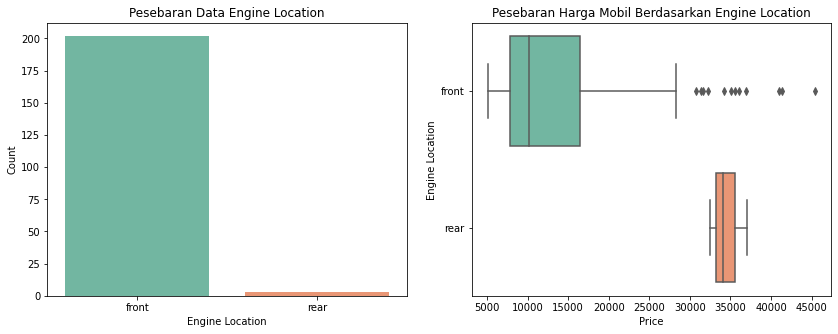

In [ ]:
# pesebaran data enginelocation dan perbandingannya dengan price
col = 'enginelocation'
title_c = 'Pesebaran Data Engine Location'
title_b = 'Pesebaran Harga Mobil Berdasarkan Engine Location'
label = 'Engine Location'

vis_cat(col, title_c, title_b, label)

- Hampir seluruh data mobil memiliki lokasi mesin di depan.
- Mobil dengan lokasi mesin di belakang cenderung memiliki harga lebih tinggi (tidak memperhatikan outliers).

- ### Engine Type

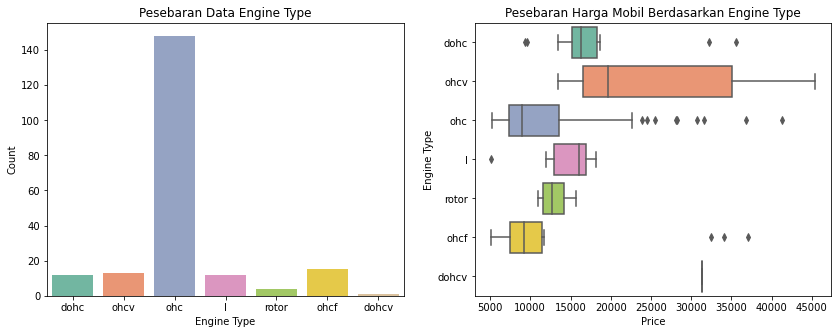

In [ ]:
# pesebaran data enginetype dan perbandingannya dengan price
col = 'enginetype'
title_c = 'Pesebaran Data Engine Type'
title_b = 'Pesebaran Harga Mobil Berdasarkan Engine Type'
label = 'Engine Type'

vis_cat(col, title_c, title_b, label)

- Kebanyakan data mobil memiliki tipe mesin ohc.
- Mobil dengan tipe mesin ohcv memiliki harga lebih tinggi dibandingkan dengan yang lain.

- ### Cylinder Number

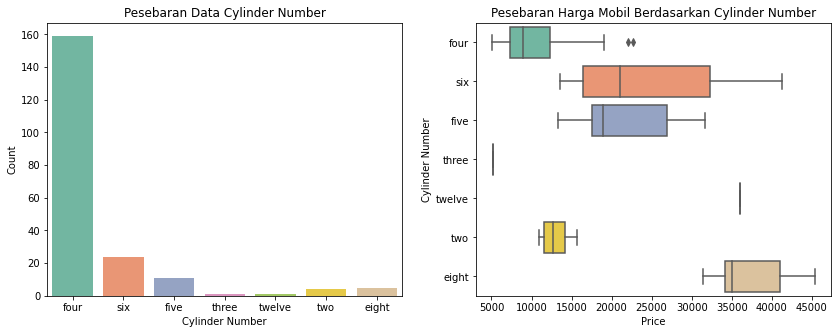

In [ ]:
# pesebaran data cylindernumber dan perbandingannya dengan price
col = 'cylindernumber'
title_c = 'Pesebaran Data Cylinder Number'
title_b = 'Pesebaran Harga Mobil Berdasarkan Cylinder Number'
label = 'Cylinder Number'

vis_cat(col, title_c, title_b, label)

- Kebanyakan data mobil memiliki empat silinder.
- Mobil dengan delapan silinder memiliki harga lebih tinggi.

- ### Fuel System

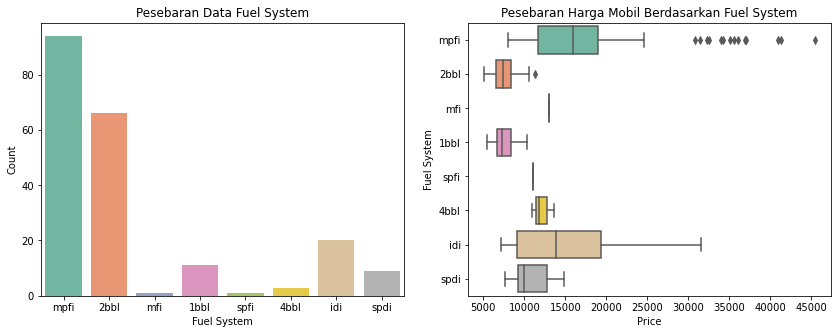

In [ ]:
# pesebaran data fuelsystem dan perbandingannya dengan price
col = 'fuelsystem'
title_c = 'Pesebaran Data Fuel System'
title_b = 'Pesebaran Harga Mobil Berdasarkan Fuel System'
label = 'Fuel System'

vis_cat(col, title_c, title_b, label)

- Kebanyakan mobil memiliki sistem bahan bakar mpfi.
- Sistem bahan bakar idi memiliki range harga paling tinggi. Namun uniknya jika kita memperhatikan outliers pada sistem mpfi, beberapa mobil memiliki harga yang tinggi.

## Kolom-Kolom Numerikal

In [ ]:
# cek kolom dengan tipe data numerikal
numerical_cols = [cname for cname in df.columns
                 if df[cname].dtype in ["int64", "float64"]]
df[numerical_cols].head(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.000
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.000
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.000
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.000
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.000
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,5500,19,25,15250.000
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710.000
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,5500,19,25,18920.000
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875.000
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,5500,16,22,17859.167


- ### Correlation Matrix

In [ ]:
# tampilkan nilai correlation setiap kolom numerik
df.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


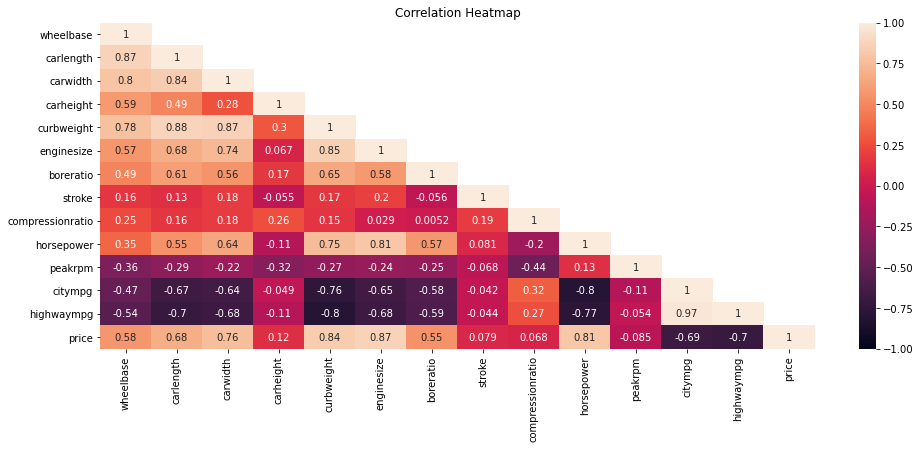

In [ ]:
# visualisasi correlation setiap kolom numerik menggunakan heatmap
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, mask=np.triu(df.corr(), k=1))
heatmap.set_title('Correlation Heatmap');

- `wheelbase` mempunyai korelasi tinggi dengan `carlength`, `carwidth`, dan `curbweight`.
- `carlength` mempunyai korelasi tinggi dengan `curbweight` dan `carwidth`, serta korelasi negatif dengan `highwaympg`.
- `carwidth` mempunyai korelasi tinggi dengan `curbweight` dan `enginesize`.
- `curbweight` mempunyai korelasi yang tinggi dengan `enginesize` dan `horsepower`, serta korelasi negatif dengan `highwaympg` dan `citympg`.
- `enginesize` mempunyai korelasi yang tinggi dengan `horsepower`.
- `horsepower` mempunyai korelasi negatif dengan `citympg` dan `highwaympg`.
- `citympg` mempunyai korelasi sangat tinggi dengan `highwaympg`.

- ### Atribut

In [ ]:
# array untuk keperluan atribut
col_name = ["Wheel Base", "Car Length", "Car Width", "Car Height", "Curb Weight", "Engine Size", "Bore Ratio",
            "Stroke", "Compression Ratio", "Horse Power", "Peak RPM", "City MPG", "Highway MPG"]

color = ['#800000', '#FF00FF', '#7B68EE', '#808000', '#800080', '#2E8B57', '#4682B4', '#FF6347', 
         '#FFA500', '#DA70D6', '#663399', '#6A5ACD', '#4682B4']

- ### Pesebaran Data Numerikal

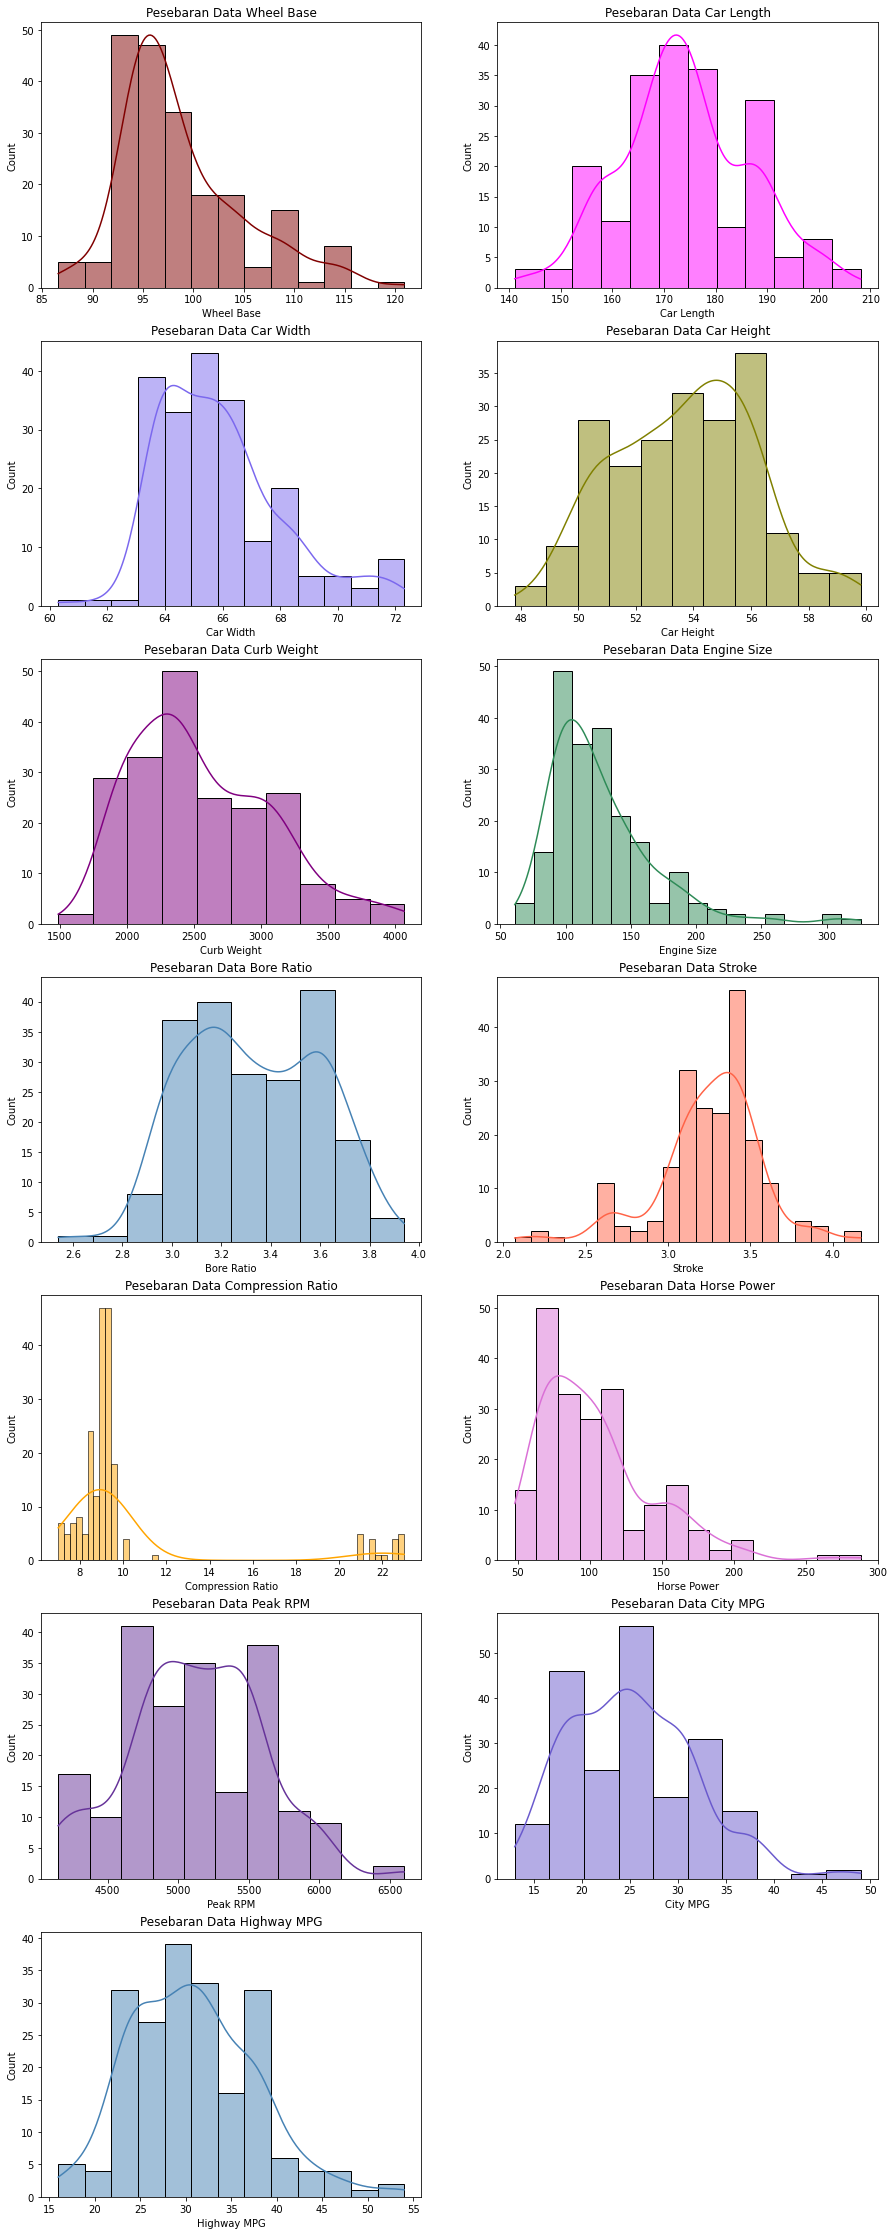

In [ ]:
# memvisualisasikan pesebaran data setiap kolom numerik
plt.figure(figsize=(15,40))

for i, col in enumerate(list(numerical_cols[:-1]), 1):
    plt.subplot(7,2,i)
    sns.histplot(x=col, data=df[df.columns[:-1]], kde=True, color = color[i-1])
    plt.title("Pesebaran Data " + col_name[i-1])
    plt.xlabel(col_name[i-1])

- Pesebaran `wheelbase` right-skewed, dengan konsentrasi paling tinggi di 90 - 100
- Pesebaran `carlength` cukup normal, dengan konsentrasi paling tinggi di 165 - 180
- Pesebaran `carwidth` right-skewed, dengan konsentrasi paling tinggi di 64 - 66
- Pesebaran `carheight` left-skewed, dengan konsentrasi paling tinggi di 54 - 57
- Pesebaran `curbweight` right-skewed, dengan konsentrasi paling tinggi di 2300 - 2600
- Pesebaran `enginesize` right-skewed, dengan konsentrasi paling tinggi di 90 - 140
- Pesebaran `boreratio` left-skewed, dengan konsentrasi paling tinggi di 3.0 - 3.6
- Pesebaran `stroke` left-skewed, dengan konsentrasi paling tinggi di 3.0 - 3.5
- Pesebaran `compressionratio` right-skewed, dengan konsentrasi paling tinggi di 9 - 10
- Pesebaran `horsepower` right-skewed, dengan konsentrasi paling tinggi di 55 - 100
- Pesebaran `peakrpm` right-skewed, dengan konsentrasi paling tinggi di 4600 - 5500
- Pesebaran `citympg` right-skewed, dengan konsentrasi paling tinggi di ~25
- Pesebaran `highwaympg` right-skewed, dengan konsentrasi paling tinggi di 25 - 34

- ### Regplot Semua Features dengan Price

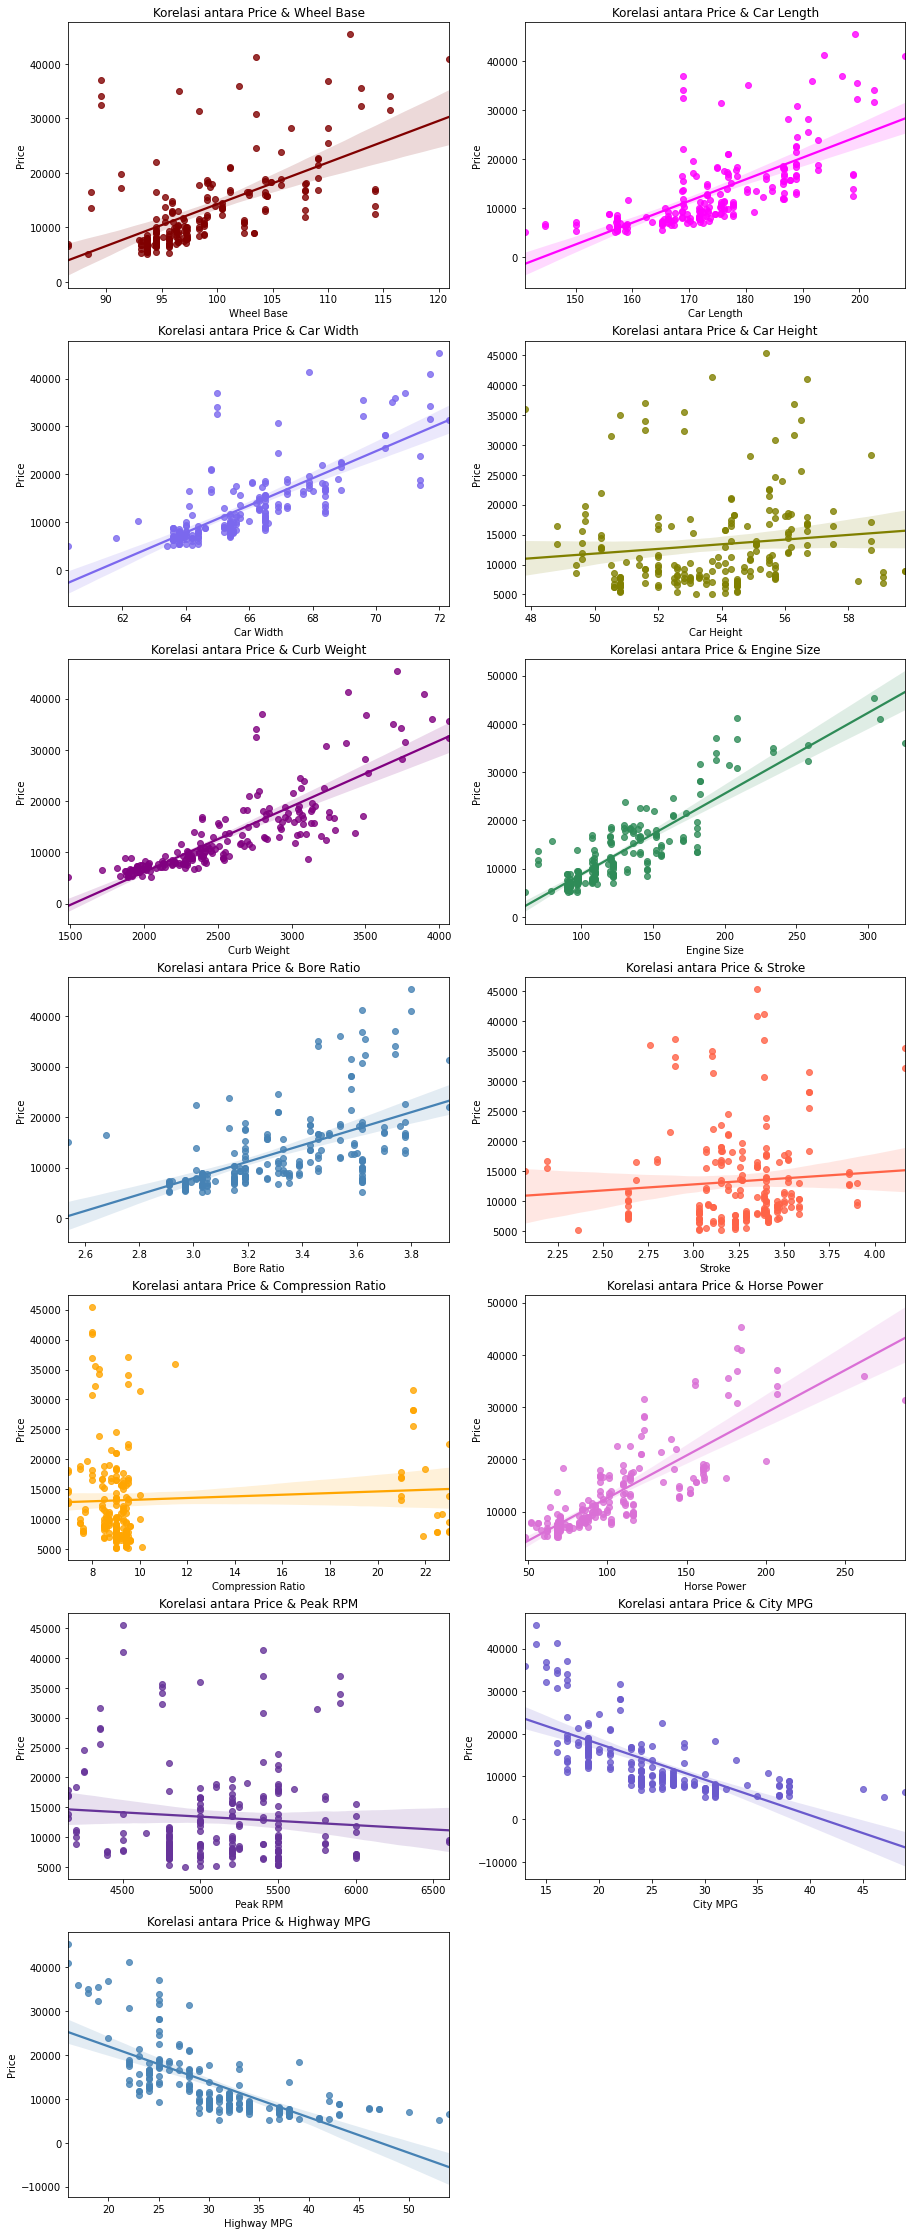

In [ ]:
# visualisasi regplot untuk setiap kolom terhadap kolom price
plt.figure(figsize=(15,40))

for i, col in enumerate(list(numerical_cols[:-1]), 1):
    plt.subplot(7,2,i)
    sns.regplot(x = col, y = df["price"], data = df[df.columns[:-1]], color = color[i-1])
    plt.title("Korelasi antara Price & " + col_name[i-1])
    plt.xlabel(col_name[i-1])
    plt.ylabel("Price")

- Korelasi positif antara harga mobil dengan `WheelBase`
- Korelasi positif antara harga mobil dengan `CarLength`
- Korelasi positif antara harga mobil dengan `CarWidth`
- Tidak ada hubungan antara Harga mobil dengan `CarHeight` 
- Ketika `CurbWeight` memasuki angka 2700, Harga mobil mulai tersebar
- Ketika `EngineSize` memasuki angka 140, Harga mobil mulai tersebar
- Korelasi antara Harga mobil dengan `BoreRatio` rendah
- Tidak ada hubungan korelasi antara Harga mobil dengan `Stroke`
- Tidak ada hubungan korelasi antara Harga mobil dengan `CompressionRatio`
- Ketika `HorsePower` memasuki angka 120, Harga mobil mulai tersebar
- Tidak ada hubungan korelasi antara Harga mobil dengan `Peakrpm`
- Korelasi negatif antara `CityMpg` dengan Harga mobil
- Korelasi negatif antara `HighWayMpg` dengan Harga mobil

- ### CarLength vs CarWidth

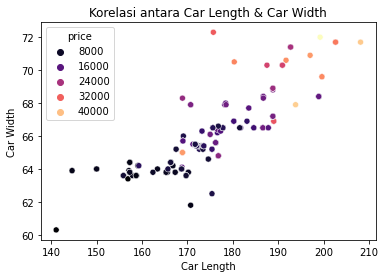

In [ ]:
# visualisasi lebih lanjut antara kolom carlength dan carwidth
fig = plt.figure()  
ax = sns.scatterplot(data = df, x = 'carlength', y = 'carwidth', hue = 'price', palette = 'magma')

plt.xlabel("Car Length")
plt.ylabel("Car Width")
plt.title("Korelasi antara Car Length & Car Width")

plt.show() 

- Relasi antara `CarLength` dan `CarWidth` kuat

- ### Horsepower Vs CarBody categorized by CarBody

<Figure size 432x288 with 0 Axes>

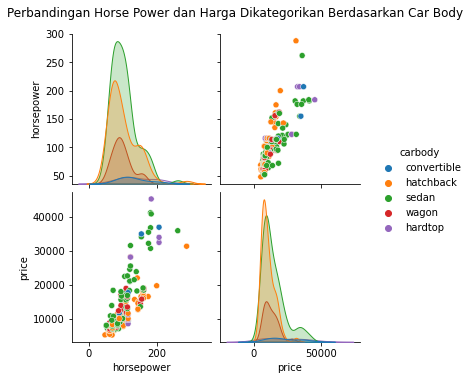

In [ ]:
# visualisasi kolom horsepower dan price dengan hue carbody
fig = plt.figure()
ax = sns.pairplot(df[['horsepower','price','carbody']], hue="carbody");
ax.fig.suptitle("Perbandingan Horse Power dan Harga Dikategorikan Berdasarkan Car Body", y=1.04)
plt.show()

- Sedan memiliki konsentrasi paling tinggi dengan nilai `horse power` sekitar 100
- Hatchback memiliki konsentrasi paling tinggi dengan `price` sekitar 10000

# Modelling

### Train Test Split 1 (Semua Features)

In [106]:
# One Hot Encoding semua features
df_dummies = pd.get_dummies(df)

# tentukan variabel X dan variabel y
X = df_dummies.loc[:, df_dummies.columns != 'price']
y = df_dummies['price']

In [107]:
# split data menjadi training dan testing set dengan perbadingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Train Test Split 2 (dengan Recursive Feature Elimination (RFE))

In [108]:
# label encode features
X2 = df.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))

# tentukan variabel X dan y
X2 = X2.drop(['price'], axis=1)
y2 = df['price']

In [109]:
# membuat objek RFE dan tampilkan features terbaik
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X2, y2)
print('Features:', X2.columns[rfe.support_])

Features: Index(['CarName', 'carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [110]:
# ambil features terbaik hasil seleksi RFE
features = list(X2.columns[rfe.support_])

# One Hot Encoding features hasil seleksi RFE
X2 = pd.get_dummies(df[features])

In [111]:
# split data menjadi training dan testing set kedua hasil seleksi RFE
# dengan perbadingan 80:20
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

### Train Test Split 3 (dengan RFE tanpa feature CarName)

In [112]:
# label encode features
X3 = df.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))

# tentukan variabel X dan y
X3 = X3.drop(['CarName', 'price'], axis=1)
y3 = df['price']

In [113]:
# membuat objek RFE dan tampilkan features terbaik
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=15, step=1)
rfe = rfe.fit(X3, y3)
print('Features:', X3.columns[rfe.support_])

Features: Index(['carbody', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')


In [114]:
# ambil features terbaik hasil seleksi RFE
features = list(X3.columns[rfe.support_])

# One Hot Encoding features hasil seleksi RFE
X3 = pd.get_dummies(df[features])

In [115]:
# split data menjadi training dan testing set ketiga hasil seleksi RFE tanpa feature CarName
# dengan perbadingan 80:20
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.2, random_state=0)

- ### Linear Regression

In [44]:
# LinearRegression menggunakan semua features
# membuat objek LinearRegression
lreg = linear_model.LinearRegression()

# train model LinearRegression
lreg.fit(X_train, y_train)

# hasil prediksi model
lreg_pred = lreg.predict(X_test)

# ambil hasil RMSE dan R2 untuk evaluasi model
rmse_lreg = mean_squared_error(y_test, lreg_pred, squared=False)
r2_lreg = r2_score(y_test, lreg_pred)

print("Evaluasi Model Basic LinearRegression")
print('RMSE:', rmse_lreg)
print('R2:', r2_lreg)
print('R2 Training:', lreg.score(X_train, y_train))

Evaluasi Model Basic LinearRegression
RMSE: 2938.6586133254214
R2: 0.8884510374294963
R2 Training: 0.9769271779686195


In [83]:
# LinearRegression menggunakan features seleksi RFE
# membuat objek LinearRegression
lreg = linear_model.LinearRegression()

# train model LinearRegression
lreg.fit(X_train_2, y_train_2)

# hasil prediksi model
lreg_pred_2 = lreg.predict(X_test_2)

# ambil hasil RMSE dan R2 untuk evaluasi model
rmse_lreg_2 = mean_squared_error(y_test_2, lreg_pred_2, squared=False)
r2_lreg_2 = r2_score(y_test_2, lreg_pred_2)

print("Evaluasi Model Basic LinearRegression dengan Features RFE")
print('RMSE:', rmse_lreg_2)
print('R2:', r2_lreg_2)
print('R2 Training:', lreg.score(X_train_2, y_train_2))

Evaluasi Model Basic LinearRegression dengan Features RFE
RMSE: 4158.476247755773
R2: 0.7766244098757875
R2 Training: 0.9664779587306223


In [116]:
# LinearRegression menggunakan features seleksi RFE tanpa CarName
# membuat objek LinearRegression
lreg = linear_model.LinearRegression()

# train model LinearRegression
lreg.fit(X_train_3, y_train_3)

# hasil prediksi model
lreg_pred_3 = lreg.predict(X_test_3)

# ambil hasil RMSE dan R2 untuk evaluasi model
rmse_lreg_3 = mean_squared_error(y_test_3, lreg_pred_3, squared=False)
r2_lreg_3 = r2_score(y_test_3, lreg_pred_3)

print("Evaluasi Model Basic LinearRegression dengan Features RFE Tanpa CarName")
print('RMSE:', rmse_lreg_3)
print('R2:', r2_lreg_3)
print('R2 Training:', lreg.score(X_train_3, y_train_3))

Evaluasi Model Basic LinearRegression dengan Features RFE Tanpa CarName
RMSE: 3536.1555877244746
R2: 0.8384786287065231
R2 Training: 0.8867546368961448


- #### Hyperparameter Tuning - Linear Regression

In [48]:
# definisikan fungsi regularization menggunakan semua features
def k_fold_eval(model):
    kf = KFold(n_splits = 5)
    RMSE_length = 5
    RMSE_list = []
    
    for i, (train, val) in enumerate(kf.split(X_train)):
        train_features = X_train.iloc[train]
        train_target = y_train.iloc[train]
        
        val_features = X_train.iloc[val]
        val_target = y_train.iloc[val]
        
        ml_model = model.fit(train_features, train_target)
        prediction = ml_model.predict(val_features)
        
        rmse_score = np.sqrt(mse(val_target, prediction))
        RMSE_list.append(rmse_score)
        
    print('RMSE Scores: ', RMSE_list)
    print(f'Average RMSE Score: {np.mean(RMSE_list)}')
    
    ml_model_final = model.fit(X_train, y_train)
    test_prediction = ml_model_final.predict(X_test)
    rmse_final = np.sqrt(mse(y_test, test_prediction))
    r2_result = r2_score(y_test, test_prediction)
    
    print(f'RMSE Evaluate on Test Set: {rmse_final}')
    print(f'R2 Score Evaluate on Test Set: {r2_result}')
    print(f'R2 Score Evaluate on Training Set:', model.score(X_train, y_train))
    return str(ml_model_final) + ' dengan semua feature'

In [85]:
print(k_fold_eval(Ridge()), '\n\n')
print(k_fold_eval(Lasso(tol=0.1)), '\n\n')
print(k_fold_eval(ElasticNet()))

RMSE Scores:  [1819.4768062568821, 2149.077679206156, 1978.7324761023074, 2742.3620008723046, 1916.7554033711128]
Average RMSE Score: 2121.2808731617524
RMSE Evaluate on Test Set: 2919.691845383933
R2 Score Evaluate on Test Set: 0.8898863151436888
R2 Score Evaluate on Training Set: 0.9706790231567023
Ridge() dengan semua feature 


RMSE Scores:  [2201.106206867161, 3437.3801206180397, 2925.4984065114277, 2277.5767474409818, 3129.1529809586373]
Average RMSE Score: 2794.14289247925
RMSE Evaluate on Test Set: 4634.032735262553
R2 Score Evaluate on Test Set: 0.7226134129191063
R2 Score Evaluate on Training Set: 0.9466097520265039
Lasso(tol=0.1) dengan semua feature 


RMSE Scores:  [2566.5193918887144, 3028.0858580457966, 2526.240822284981, 4178.689990531819, 3187.468247228621]
Average RMSE Score: 3097.4008619959864
RMSE Evaluate on Test Set: 3613.3712148125655
R2 Score Evaluate on Test Set: 0.8313476397512357
R2 Score Evaluate on Training Set: 0.8777366934146732
ElasticNet() dengan semua 

In [86]:
# definisikan fungsi regularization menggunakan features seleksi RFE
def k_fold_eval_2(model):
    kf = KFold(n_splits = 5)
    RMSE_length = 5
    RMSE_list = []
    
    for i, (train, val) in enumerate(kf.split(X_train_2)):
        train_features = X_train_2.iloc[train]
        train_target = y_train_2.iloc[train]
        
        val_features = X_train_2.iloc[val]
        val_target = y_train_2.iloc[val]
        
        ml_model = model.fit(train_features, train_target)
        prediction = ml_model.predict(val_features)
        
        rmse_score = np.sqrt(mse(val_target, prediction))
        RMSE_list.append(rmse_score)
        
    print('RMSE Scores:', RMSE_list)
    print(f'Average RMSE Score: {np.mean(RMSE_list)}')
    
    ml_model_final = model.fit(X_train_2, y_train_2)
    test_prediction = ml_model_final.predict(X_test_2)
    rmse_final = np.sqrt(mse(y_test_2, test_prediction))
    r2_result = r2_score(y_test_2, test_prediction)
    
    print(f'RMSE Evaluate on Test Set: {rmse_final}')
    print(f'R2 Score Evaluate on Test Set: {r2_result}')
    print(f'R2 Score Evaluate on Training Set:', model.score(X_train_2, y_train_2))
    return str(ml_model_final) + ' dengan feature hasil seleksi RFE'

In [90]:
print(k_fold_eval_2(Ridge()), '\n\n')
print(k_fold_eval_2(Lasso()), '\n\n')
print(k_fold_eval_2(ElasticNet()))

RMSE Scores: [1989.083908873033, 2241.243943480749, 2064.019702394914, 3241.983256341184, 1991.2815834173534]
Average RMSE Score: 2305.5224789014464
RMSE Evaluate on Test Set: 3259.7835049943287
R2 Score Evaluate on Test Set: 0.862739752379783
R2 Score Evaluate on Training Set: 0.9550133631624369
Ridge() dengan feature hasil seleksi RFE 


RMSE Scores: [1604.5336345225066, 2228.2149266913398, 1748.6560167374557, 2240.449182076685, 1913.824245585368]
Average RMSE Score: 1947.1356011226712
RMSE Evaluate on Test Set: 4095.188575190708
R2 Score Evaluate on Test Set: 0.7833717595157337
R2 Score Evaluate on Training Set: 0.9664330665134686
Lasso() dengan feature hasil seleksi RFE 


RMSE Scores: [2701.456057265617, 3132.1360844283854, 2654.3121993266036, 4292.245429063908, 3348.7152692134455]
Average RMSE Score: 3225.773007859592
RMSE Evaluate on Test Set: 3644.853760859788
R2 Score Evaluate on Test Set: 0.8283959715603622
R2 Score Evaluate on Training Set: 0.8608659252547978
ElasticNet() de

In [87]:
# definisikan fungsi regularization menggunakan features seleksi RFE tanpa CarName
def k_fold_eval_3(model):
    kf = KFold(n_splits = 5)
    RMSE_length = 5
    RMSE_list = []
    
    for i, (train, val) in enumerate(kf.split(X_train_3)):
        train_features = X_train_3.iloc[train]
        train_target = y_train_3.iloc[train]
        
        val_features = X_train_3.iloc[val]
        val_target = y_train_3.iloc[val]
        
        ml_model = model.fit(train_features, train_target)
        prediction = ml_model.predict(val_features)
        
        rmse_score = np.sqrt(mse(val_target, prediction))
        RMSE_list.append(rmse_score)
        
    print('RMSE Scores:', RMSE_list)
    print(f'Average RMSE Score: {np.mean(RMSE_list)}')
    
    ml_model_final = model.fit(X_train_3, y_train_3)
    test_prediction = ml_model_final.predict(X_test_3)
    rmse_final = np.sqrt(mse(y_test_3, test_prediction))
    r2_result = r2_score(y_test, test_prediction)
    
    print(f'RMSE Evaluate on Test Set: {rmse_final}')
    print(f'R2 Score Evaluate on Test Set: {r2_result}')
    print(f'R2 Score Evaluate on Training Set:', model.score(X_train_3, y_train_3))
    return str(ml_model_final) + ' dengan feature hasil seleksi RFE tanpa CarName'

In [89]:
print(k_fold_eval_3(Ridge()), '\n\n')
print(k_fold_eval_3(Lasso()), '\n\n')
print(k_fold_eval_3(ElasticNet()))

RMSE Scores: [2901.2020839447314, 3075.5521834592923, 3164.505105876414, 4303.627032442895, 2946.9341526174476]
Average RMSE Score: 3278.364111668156
RMSE Evaluate on Test Set: 3602.7468077013414
R2 Score Evaluate on Test Set: 0.832337959851463
R2 Score Evaluate on Training Set: 0.8843564084192894
Ridge() dengan feature hasil seleksi RFE tanpa CarName 


RMSE Scores: [2897.3928891169917, 3133.808176056591, 3240.481755210488, 4359.570841803371, 3041.188562088953]
Average RMSE Score: 3334.488444855279
RMSE Evaluate on Test Set: 3550.840460389619
R2 Score Evaluate on Test Set: 0.8371343180603643
R2 Score Evaluate on Training Set: 0.8867129561991085
Lasso() dengan feature hasil seleksi RFE tanpa CarName 


RMSE Scores: [2792.334472726928, 3180.4132801738115, 2741.348151622585, 4359.976408001936, 3415.5396755640977]
Average RMSE Score: 3297.922397617872
RMSE Evaluate on Test Set: 3736.8934218644836
R2 Score Evaluate on Test Set: 0.819619874054324
R2 Score Evaluate on Training Set: 0.8527029

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.558e+06, tolerance: 8.002e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.456e+07, tolerance: 7.989e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


- ### CatBoost

In [91]:
# membuat objek CatBoostRegressor
cbreg = cb.CatBoostRegressor(logging_level='Silent')

# train model CatBoostRegressor
cbreg.fit(X_train, y_train)

# hasil prediksi model
pred = cbreg.predict(X_test)

# ambil hasil RMSE dan R2 untuk evaluasi model
rmse_cbreg = np.sqrt(mean_squared_error(y_test, pred))
r2_cbreg = r2_score(y_test, pred)

print("Evaluasi Model Basic CatBoostRegressor")
print('RMSE:', rmse_cbreg)
print('R2:', cbreg.score(X_test, y_test))
print('R2 Training:', cbreg.score(X_train, y_train))

Evaluasi Model Basic CatBoostRegressor
RMSE: 2896.2560769213183
R2: 0.8916469405725752
R2 Training: 0.9969026911894561


In [92]:
# train model CatBoostRegressor menggunakan training testing set 2
cbreg.fit(X_train_2, y_train_2)

# hasil prediksi model
pred_2 = cbreg.predict(X_test_2)

# ambil hasil RMSE dan R2 untuk evaluasi model
rmse_cbreg_2 = np.sqrt(mean_squared_error(y_test_2, pred_2))
r2_cbreg_2 = r2_score(y_test_2, pred_2)

print("Evaluasi Model Basic CatBoosRegressor dengan Features RFE")
print('RMSE:', rmse_cbreg_2)
print('R2:', cbreg.score(X_test_2, y_test_2))
print('R2 Training:', cbreg.score(X_train_2, y_train_2))

Evaluasi Model Basic CatBoosRegressor dengan Features RFE
RMSE: 2706.349618614288
R2: 0.9053904313458858
R2 Training: 0.9970891950172797


In [93]:
# train model CatBoostRegressor menggunakan training testing set 3
cbreg.fit(X_train_3, y_train_3)

# hasil prediksi model
pred_3 = cbreg.predict(X_test_3)

# ambil hasil RMSE dan R2 untuk evaluasi model
rmse_cbreg_3 = np.sqrt(mean_squared_error(y_test_3, pred_3))
r2_cbreg_3 = r2_score(y_test_3, pred_3)

print("Evaluasi Model CatBoosRegressor dengan Features RFE tanpa CarName")
print('RMSE:', rmse_cbreg_3)
print('R2:', r2_cbreg_3)
print('R2 Training:', cbreg.score(X_train_3, y_train_3))

Evaluasi Model CatBoosRegressor dengan Features RFE tanpa CarName
RMSE: 2714.9479717376603
R2: 0.904788307555266
R2 Training: 0.9972299134133155


- #### Hyperparameter Tuning - CatBoost Regressor

In [57]:
# set parameter
cb_params = {'depth':[3,1,2,6,4,5,7,8,9,10],
          'iterations':[250,100,150,300,200],
          'learning_rate':[0.03,0.001,0.02,0.1,0.2,0.3], 
          'l2_leaf_reg':[3,1,5,10,100,25],
          'border_count':[32,5,10,20,50,100,200]}

In [58]:
# Random search of parameters, using 2 fold cross validation, 
# search across 100 different combinations, and use all available cores
cbreg_random = RandomizedSearchCV(estimator=cbreg, param_distributions=cb_params,
                              n_iter = 100, cv=5, verbose=3, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [59]:
# fit random search model
cbreg_random.fit(X_train, y_train)

# tampilkan parameter terbaik
cbreg_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'border_count': 100,
 'depth': 6,
 'iterations': 300,
 'l2_leaf_reg': 10,
 'learning_rate': 0.2}

In [61]:
# ambil parameter terbaik
cbreg_best = cbreg_random.best_estimator_

# traing model CatBoostRegressor dengan parameter pilihan menggunakan training sets
cbreg_best.fit(X_train, y_train)

# hasil prediksi model new CBR
pred_new = cbreg_best.predict(X_test)

# ambil hasil RMSE dan R2 untuk evaluasi model
rmse_cbreg_new = np.sqrt(mean_squared_error(y_test, pred_new))
r2_cbreg_new = r2_score(y_test, pred_new)

print("Evaluasi Model Baru CatBoostRegressor")
print('RMSE:', rmse_cbreg_new)
print('R2:', r2_cbreg_new)
print('R2 Training:', cbreg_best.score(X_train, y_train))

Evaluasi Model Baru CatBoostRegressor
RMSE: 2800.1237723028817
R2: 0.8987204601162909
R2 Training: 0.9956490810644396


In [67]:
# fit random search model
cbreg_random.fit(X_train_2, y_train_2)

# tampilkan parameter terbaik
cbreg_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'border_count': 100,
 'depth': 3,
 'iterations': 200,
 'l2_leaf_reg': 10,
 'learning_rate': 0.3}

In [68]:
# ambil parameter terbaik
cbreg_best = cbreg_random.best_estimator_

# traing model CBR dengan parameter pilihan menggunakan training sets 2
cbreg_best.fit(X_train_2, y_train_2)

# hasil prediksi model new CBR dengan feature pilihan
pred_new = cbreg_random.best_estimator_.predict(X_test_2)

# ambil hasil RMSE dan R2 untuk evaluasi model
rmse_cbreg_new = np.sqrt(mean_squared_error(y_test_2, pred_new))
r2_cbreg_new = r2_score(y_test_2, pred_new)

print("Evaluasi Model Baru CatBoostRegressor dengan Features RFE")
print('RMSE:', rmse_cbreg_new)
print('R2:', r2_cbreg_new)
print('R2 Training:', cbreg_best.score(X_train_2, y_train_2))

Evaluasi Model Baru CatBoostRegressor dengan Features RFE
RMSE: 2614.8172380899923
R2: 0.9116818545120756
R2 Training: 0.992216664305715


In [64]:
# fit random search model
cbreg_random.fit(X_train_3, y_train_3)

# tampilkan parameter terbaik
cbreg_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'border_count': 200,
 'depth': 2,
 'iterations': 300,
 'l2_leaf_reg': 5,
 'learning_rate': 0.2}

In [66]:
# ambil parameter terbaik
cbreg_best = cbreg_random.best_estimator_

# traing model CBR dengan parameter pilihan menggunakan training sets 3
cbreg_best.fit(X_train_3, y_train_3)

# hasil prediksi model new CBR dengan feature pilihan
pred_new = cbreg_random.best_estimator_.predict(X_test_3)

# ambil hasil RMSE dan R2 untuk evaluasi model
rmse_cbreg_new = np.sqrt(mean_squared_error(y_test_3, pred_new))
r2_cbreg_new = r2_score(y_test_3, pred_new)

print("Evaluasi Model Baru CatBoostRegressor dengan Features RFE tanpa CarName")
print('RMSE:', rmse_cbreg_new)
print('R2:', r2_cbreg_new)
print('R2 Training:', cbreg_best.score(X_train_3, y_train_3))

Evaluasi Model Baru CatBoostRegressor dengan Features RFE tanpa CarName
RMSE: 2866.9551548008135
R2: 0.8938282289635902
R2 Training: 0.9904638320428717


- ### Random Forest Regressor

In [94]:
# membuat objek RandomForestRegressor
Rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, 
                            n_estimators=100, oob_score=True)

# train model RandomForestRegressor
Rf.fit(X_train, y_train)

# hasil prediksi model
Rf_pred = Rf.predict(X_test)

# ambil hasil RMSE dan R2 untuk evaluasi model
rmse_Rf = np.sqrt(mse(y_test, Rf_pred))
r2_Rf = r2_score(y_test, Rf_pred)

print("Evaluasi Model Basic RandomForestRegressor")
print('RMSE:', rmse_Rf)
print('R2-Score:', r2_Rf)
print('R2-Score Training:', Rf.score(X_train, y_train))

Evaluasi Model Basic RandomForestRegressor
RMSE: 2764.1365130350314
R2-Score: 0.9013070255673232
R2-Score Training: 0.9761864193134654


In [95]:
# train model RandomForestRegressor menggunakan training testing set 2
# membuat objek RandomForestRegressor
Rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, 
                            n_estimators=100, oob_score=True)

# train model RandomForestRegressor
Rf.fit(X_train_2, y_train_2)

# hasil prediksi model
Rf_pred_2 = Rf.predict(X_test_2)

# ambil hasil RMSE dan R2 untuk evaluasi model
rmse_Rf_2 = np.sqrt(mse(y_test_2, Rf_pred_2))
r2_Rf_2 = r2_score(y_test_2, Rf_pred_2)

print("Evaluasi Model RandomForestRegressor dengan Features RFE")
print('RMSE:', rmse_Rf_2)
print('R2-Score:', r2_Rf_2)
print('R2-Score Training:', Rf.score(X_train_2, y_train_2))

Evaluasi Model RandomForestRegressor dengan Features RFE
RMSE: 2793.524970332716
R2-Score: 0.8991972505671848
R2-Score Training: 0.9762696505671665


In [96]:
# train model RandomForestRegressor menggunakan training testing set 3
# membuat objek RandomForestRegressor
Rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, 
                            n_estimators=100, oob_score=True)

# train model RandomForestRegressor
Rf.fit(X_train_3, y_train_3)

# hasil prediksi model
Rf_pred_3 = Rf.predict(X_test_3)

# ambil hasil RMSE dan R2 untuk evaluasi model
rmse_Rf_3 = np.sqrt(mse(y_test_3, Rf_pred_3))
r2_Rf_3 = r2_score(y_test_3, Rf_pred_3)

print("Evaluasi Model RandomForestRegressor dengan Features RFE tanpa CarName")
print('RMSE:', rmse_Rf_3)
print('R2-Score:', r2_Rf_3)
print('R2-Score Training:', Rf.score(X_train_3, y_train_3))

Evaluasi Model RandomForestRegressor dengan Features RFE tanpa CarName
RMSE: 2761.33977272386
R2-Score: 0.9015066387062215
R2-Score Training: 0.9750821946014671


- #### Hyperparameter Tuning - Random Forest Regressor

In [72]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [73]:
# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, cv = 5, verbose=3, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [74]:
# Fit the random search model
rf_random.fit(X_train, y_train)

# tampilkan parameter terbaik
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1600}

In [78]:
# ambil parameter terbaik
rf_best = rf_random.best_estimator_

# traing model RandomForestRegressor dengan parameter pilihan menggunakan training sets
rf_best.fit(X_train, y_train)

# hasil prediksi model new Random
new_pred = rf_random.best_estimator_.predict(X_test)

# ambil hasil RMSE dan R2 untuk evaluasi model
new_rmse = np.sqrt(mse(y_test, new_pred))
new_r2 = r2_score(y_test, new_pred)

print("Evaluasi Model Baru RandomForestRegressor")
print('RMSE:', new_rmse)
print('R2-Score:', new_r2)
print('R2-Score Training:', rf_best.score(X_train, y_train))

Evaluasi Model Baru RandomForestRegressor
RMSE: 2759.5296883623664
R2-Score: 0.9016357230457958
R2-Score Training: 0.9896722774109044


In [79]:
# Fit the random search model
rf_random.fit(X_train_2, y_train_2)

# tampilkan parameter terbaik
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1600}

In [80]:
# ambil parameter terbaik
rf_best = rf_random.best_estimator_

# traing model RandomForestRegressor dengan parameter pilihan menggunakan training sets 2
rf_best.fit(X_train_2, y_train_2)

# hasil prediksi model new Random
new_pred_2 = rf_random.best_estimator_.predict(X_test_2)

# ambil hasil RMSE dan R2 untuk evaluasi model
new_rmse_2 = np.sqrt(mse(y_test_2, new_pred_2))
new_r2_2 = r2_score(y_test_2, new_pred_2)

print("Evaluasi Model Baru RandomForestRegressor dengan Features RFE")
print('RMSE:', new_rmse_2)
print('R2-Score:', new_r2_2)
print('R2-Score Training:', rf_best.score(X_train_2, y_train_2))

Evaluasi Model Baru RandomForestRegressor dengan Features RFE
RMSE: 2734.886741028457
R2-Score: 0.9033846895150198
R2-Score Training: 0.9895007383134786


In [81]:
# Fit the random search model
rf_random.fit(X_train_3, y_train_3)

# tampilkan parameter terbaik
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1600}

In [82]:
# ambil parameter terbaik
rf_best = rf_random.best_estimator_

# traing model RandomForestRegressor dengan parameter pilihan menggunakan training sets 3
rf_best.fit(X_train_3, y_train_3)

# hasil prediksi model new Random
new_pred_3 = rf_random.best_estimator_.predict(X_test_3)

# ambil hasil RMSE dan R2 untuk evaluasi model
new_rmse_3 = np.sqrt(mse(y_test_3, new_pred_3))
new_r2_3 = r2_score(y_test_3, new_pred_3)

print("Evaluasi Model Baru RandomForestRegressor dengan Features RFE tanpa CarName")
print('RMSE:', new_rmse_3)
print('R2-Score:', new_r2_3)
print('R2-Score Training:', rf_best.score(X_train_3, y_train_3))

Evaluasi Model Baru RandomForestRegressor dengan Features RFE tanpa CarName
RMSE: 2742.6181547201654
R2-Score: 0.9028376622804676
R2-Score Training: 0.9896230460106713


# Area Testing

In [ ]:
sns.boxplot(y = 'carbody', x = 'horsepower', data = df, palette = 'Set2')
# ax.set_title(title_box)
# plt.xlabel("Harga")
# plt.ylabel(xy_label)

In [ ]:
# Pesebaran harga mobil berdasarkan merek
fig = plt.figure(figsize=(18, 9))
ax = sns.boxplot(y = 'fueltype', x = 'compressionratio', data = df, palette = 'Set2')

plt.title("Pesebaran Horsepower Berdasarkan Merek")
plt.xlabel("Compression Ratio")
plt.ylabel("Fuel Type")

plt.show()

In [ ]:
df.loc[(df['enginelocation'] == 'rear')]

In [ ]:
plot = sns.countplot(y='CarName',data=df)
plot=plt.setp(plot.get_xticklabels(), rotation=80)

In [ ]:
X = df.apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
X=X.drop(['price'],axis=1)
y=df['price']

In [ ]:
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=17, step=1)
rfe = rfe.fit(X, y)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])

In [ ]:
features = list(X.columns[rfe.support_])

X = X[features]
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'squared_error',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(X_train,y_train)
Rf_train_pred = Rf.predict(X_train)
Rf_test_pred = Rf.predict(X_test)

r2_score(y_test,Rf_test_pred)

In [ ]:
#corr = df.corr()
#corr.style.background_gradient(cmap = "inferno")